In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
import os
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn import svm

In [252]:
DATA_PATH = "/content/drive/MyDrive/Anormaly/DATA"

In [253]:
normal = pd.read_csv(DATA_PATH + "/SWaT_normal_data_v0.csv")

In [254]:
normal.loc[normal["Normal/Attack"] == "Normal", "Normal/Attack"] = 1

In [255]:
value_counts = normal['Normal/Attack'].value_counts()
value_counts

1    496800
Name: Normal/Attack, dtype: int64

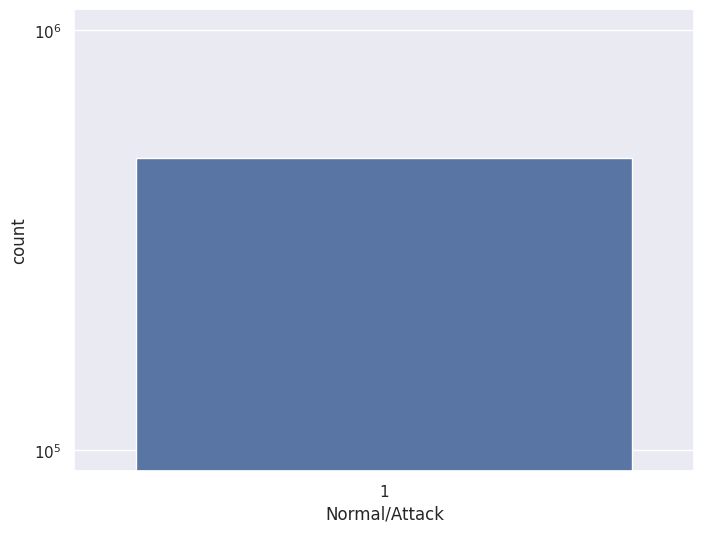

In [256]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.countplot(x='Normal/Attack', data=normal, ax=ax)
_ = plt.yscale('log')

In [257]:
attack = pd.read_csv(DATA_PATH + "/SWaT_attack_data_v0.csv")

In [258]:
replace_dict = {"A ttack":"Attack","Normal":"Normal","Attack":"Attack" }
attack['Normal/Attack'] = attack['Normal/Attack'].map(replace_dict)

In [259]:
attack.loc[attack["Normal/Attack"] == "Attack", "Normal/Attack"] = -1
attack.loc[attack["Normal/Attack"] == "Normal", "Normal/Attack"] = 1

In [260]:
value_counts = attack['Normal/Attack'].value_counts()
value_counts

 1    395298
-1     54621
Name: Normal/Attack, dtype: int64

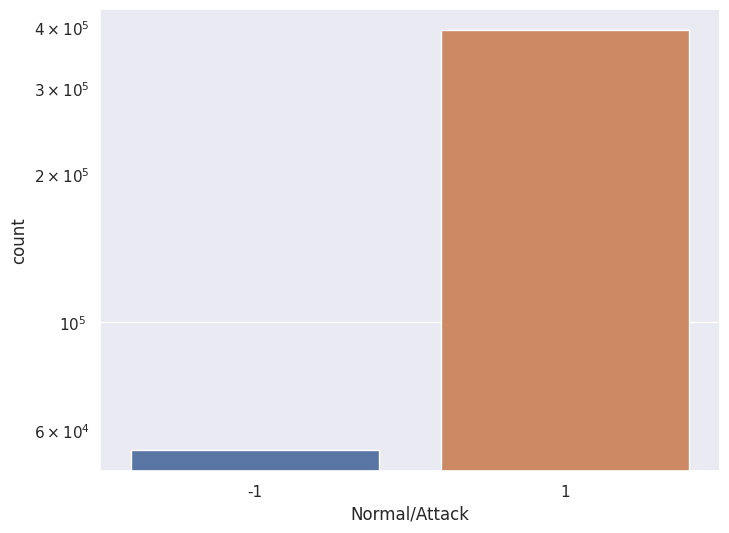

In [261]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.countplot(x='Normal/Attack', data=attack, ax=ax)
_ = plt.yscale('log')

In [262]:
normal = normal.drop(["Timestamp", "AIT201", "AIT202", "AIT203", "P201", "AIT401", "AIT402", "AIT501",  "AIT502", "AIT503", "AIT504", "FIT503", "FIT504", "PIT501", "PIT502", "PIT503"], axis=1)

In [263]:
attack = attack.drop(["Timestamp", "AIT201", "AIT202", "AIT203", "P201", "AIT401", "AIT402", "AIT501", "AIT502", "AIT503", "AIT504", "FIT503", "FIT504", "PIT501", "PIT502", "PIT503"], axis=1)

In [264]:
X_train = normal

In [265]:
y_train = X_train['Normal/Attack'].values

In [266]:
y_train = y_train.astype(int)

In [267]:
X_train = X_train.drop(['Normal/Attack'], axis=1).values

In [268]:
X_train

array([[  2.470294, 261.5804  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.457163, 261.1879  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.439548, 260.9131  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       ...,
       [  2.434744, 522.886   ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.428338, 522.9252  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.427057, 522.8467  ,   2.      , ...,   1.      ,   1.      ,
          1.      ]])

In [269]:
X_test = attack

In [270]:
y_test= X_test['Normal/Attack'].values

In [271]:
y_test= y_test.astype(int)

In [272]:
X_test = X_test.drop(['Normal/Attack'], axis=1).values

In [273]:
X_test

array([[  2.427057, 522.8467  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.446274, 522.886   ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.489191, 522.8467  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       ...,
       [  2.531467, 520.6878  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.521218, 520.7271  ,   2.      , ...,   1.      ,   1.      ,
          1.      ],
       [  2.501681, 521.1196  ,   2.      , ...,   1.      ,   1.      ,
          1.      ]])

In [274]:
from sklearn import preprocessing
import pickle
min_max_scaler = preprocessing.MinMaxScaler()
filename = 'min_max_scaler.sav'
pickle.dump(min_max_scaler, open(filename, 'wb'))
x = X_train
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

In [275]:
x = X_test
x_scaled = min_max_scaler.transform(x)
X_test = pd.DataFrame(x_scaled)

In [276]:
X_train = X_train.values

In [277]:
X_train

array([[0.89989479, 0.16029167, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89511135, 0.15984534, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88869444, 0.15953284, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.88694441, 0.45744046, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88461079, 0.45748504, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88414414, 0.45739577, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [278]:
X_test = X_test.values

In [279]:
X_test

array([[0.88414414, 0.45739577, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89114463, 0.45744046, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90677872, 0.45739577, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92217929, 0.45494073, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.91844572, 0.45498543, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.91132865, 0.45543176, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [280]:
print("Train dataset: \n{}".format(pd.value_counts(y_train)))
print("Test dataset: \n{}".format(pd.value_counts(y_test)))

Train dataset: 
1    496800
dtype: int64
Test dataset: 
 1    395298
-1     54621
dtype: int64


In [281]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [282]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [283]:
from sklearn import svm

In [284]:
oc_svm = svm.OneClassSVM(nu=0.0007, kernel="rbf", gamma="auto")

In [285]:
%%time
oc_svm.fit(X_train)

CPU times: user 27.8 s, sys: 112 ms, total: 27.9 s
Wall time: 27.8 s


OneClassSVM(gamma='auto', nu=0.0007)

In [286]:
%%time
y_pred = oc_svm.predict(X_test)

CPU times: user 10.2 s, sys: 26.3 ms, total: 10.3 s
Wall time: 10.2 s


In [287]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [288]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [289]:
accuracy_test = accuracy_score(y_test, y_pred)
print("accuracy_test=", accuracy_test)

accuracy_test= 0.9582347044690267


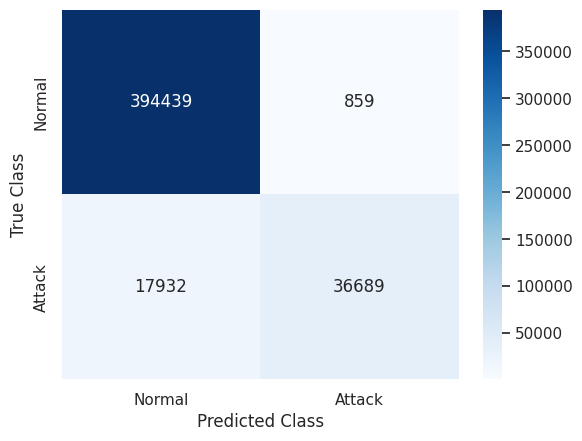

In [290]:
from sklearn.metrics import confusion_matrix
LABELS = [1 , -1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=LABELS)
fig, ax = plt.subplots()
_ = sns.heatmap(conf_matrix,xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'],
               annot=True,cmap="Blues",fmt = "d",ax=ax)
_ = ax.set_xlabel('Predicted Class')
_ = ax.set_ylabel('True Class')

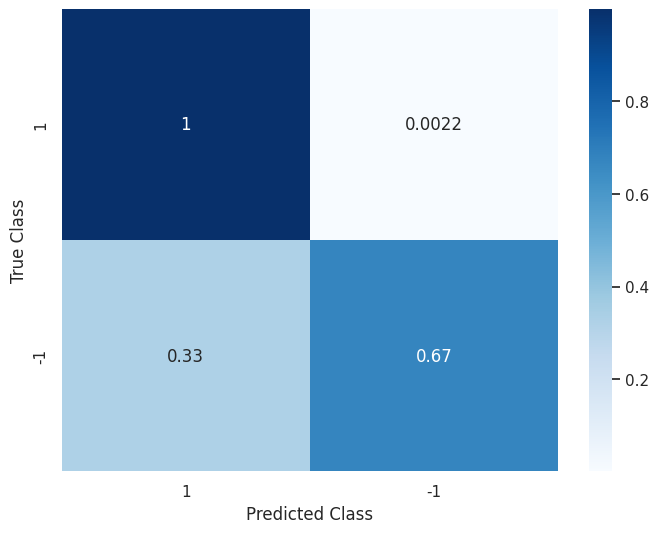

In [291]:
cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS,
               annot=True,cmap="Blues", ax=ax)
_ = ax.set_xlabel('Predicted Class')
_ = ax.set_ylabel('True Class')

In [292]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=LABELS)
TN=conf_matrix[1][1]
TP=conf_matrix[-1][-1]
FN=conf_matrix[-1][1]
FP=conf_matrix[1][-1]

In [293]:
print("confusion_matrix:\n", conf_matrix)

confusion_matrix:
 [[394439    859]
 [ 17932  36689]]


In [294]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report

In [295]:
report = classification_report(y_test, y_pred)

In [296]:
print(report)

              precision    recall  f1-score   support

          -1       0.98      0.67      0.80     54621
           1       0.96      1.00      0.98    395298

    accuracy                           0.96    449919
   macro avg       0.97      0.83      0.89    449919
weighted avg       0.96      0.96      0.95    449919



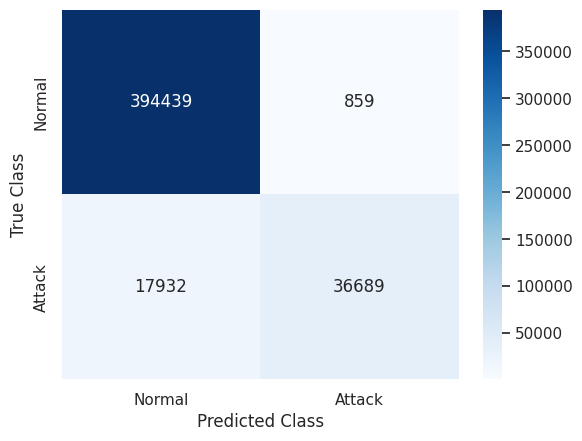

In [297]:
from sklearn.metrics import confusion_matrix
LABELS = [1 , -1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=LABELS)
fig, ax = plt.subplots()
_ = sns.heatmap(conf_matrix,xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'],
               annot=True,cmap="Blues",fmt = "d",ax=ax)
_ = ax.set_xlabel('Predicted Class')
_ = ax.set_ylabel('True Class')

In [298]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve

auc = roc_auc_score(y_test,y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]

print("Precision = {}".format(precision_score(y_test, y_pred, pos_label=-1)))
print("Recall = {}".format(recall_score(y_test, y_pred, pos_label=-1)))
print("F1 = {}".format(f1_score(y_test, y_pred, pos_label=-1)))
print("AUC = {}".format(auc))
print("EER = {}".format(eer))

Precision = 0.9771226163843614
Recall = 0.6717013602826751
F1 = 0.7961245104102247
AUC = 0.8347641580744413
EER = 0.3282986397173248
